In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Ride_booking.csv')
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [38]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
df.describe()

,Date,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,150000,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,2024-06-30 16:42:40.320000,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
min,2024-01-01 00:00:00,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,2024-03-31 00:00:00,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,2024-07-01 00:00:00,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,2024-09-30 00:00:00,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,2024-12-30 00:00:00,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000
std,NaN,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819


In [41]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Value counts for column: {col}")
    display(df[col].value_counts())
    print("\n")

Value counts for column: Time


,count
Time,
17:44:57,16
19:17:33,12
17:54:33,11
11:29:50,11
10:23:23,11
...,...
14:31:44,1
01:50:30,1
16:17:05,1




Value counts for column: Booking ID


,count
Booking ID,
"""CNR6337479""",3
"""CNR7199036""",3
"""CNR3648267""",3
"""CNR2726142""",3
"""CNR5292943""",3
...,...
"""CNR7686931""",1
"""CNR8314394""",1
"""CNR1224369""",1




Value counts for column: Booking Status


,count
Booking Status,
Completed,93000
Cancelled by Driver,27000
No Driver Found,10500
Cancelled by Customer,10500
Incomplete,9000




Value counts for column: Customer ID


,count
Customer ID,
"""CID6715450""",3
"""CID5481002""",3
"""CID4523979""",3
"""CID6468528""",3
"""CID8727691""",3
...,...
"""CID7454593""",1
"""CID6137945""",1
"""CID5532610""",1




Value counts for column: Vehicle Type


,count
Vehicle Type,
Auto,37419
Go Mini,29806
Go Sedan,27141
Bike,22517
Premier Sedan,18111
eBike,10557
Uber XL,4449




Value counts for column: Pickup Location


,count
Pickup Location,
Khandsa,949
Barakhamba Road,946
Saket,931
Badarpur,921
Pragati Maidan,920
...,...
Mandi House,800
Noida Sector 18,799
Laxmi Nagar,797




Value counts for column: Drop Location


,count
Drop Location,
Ashram,936
Basai Dhankot,917
Lok Kalyan Marg,916
Narsinghpur,913
Cyber Hub,912
...,...
MG Road,799
Bhiwadi,792
Shivaji Park,786




Value counts for column: Reason for cancelling by Customer


,count
Reason for cancelling by Customer,
Wrong Address,2362
Change of plans,2353
Driver is not moving towards pickup location,2335
Driver asked to cancel,2295
AC is not working,1155




Value counts for column: Driver Cancellation Reason


,count
Driver Cancellation Reason,
Customer related issue,6837
The customer was coughing/sick,6751
Personal & Car related issues,6726
More than permitted people in there,6686




Value counts for column: Incomplete Rides Reason


,count
Incomplete Rides Reason,
Customer Demand,3040
Vehicle Breakdown,3012
Other Issue,2948




Value counts for column: Payment Method


,count
Payment Method,
UPI,45909
Cash,25367
Uber Wallet,12276
Credit Card,10209
Debit Card,8239


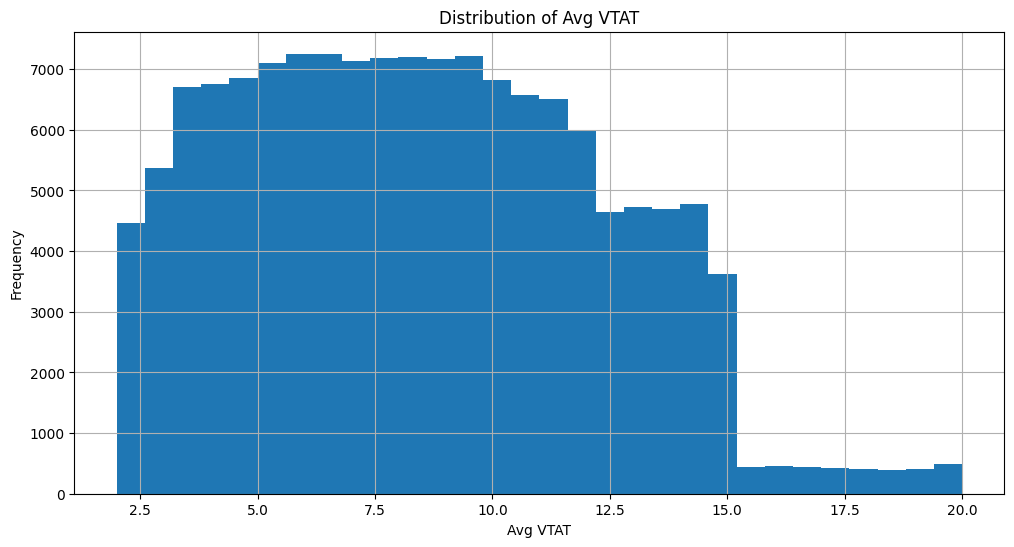

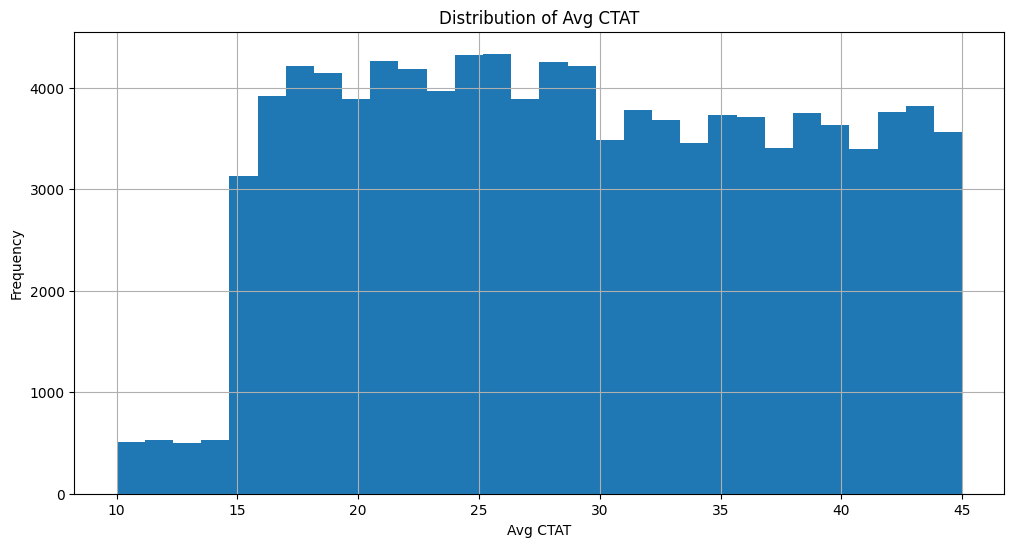

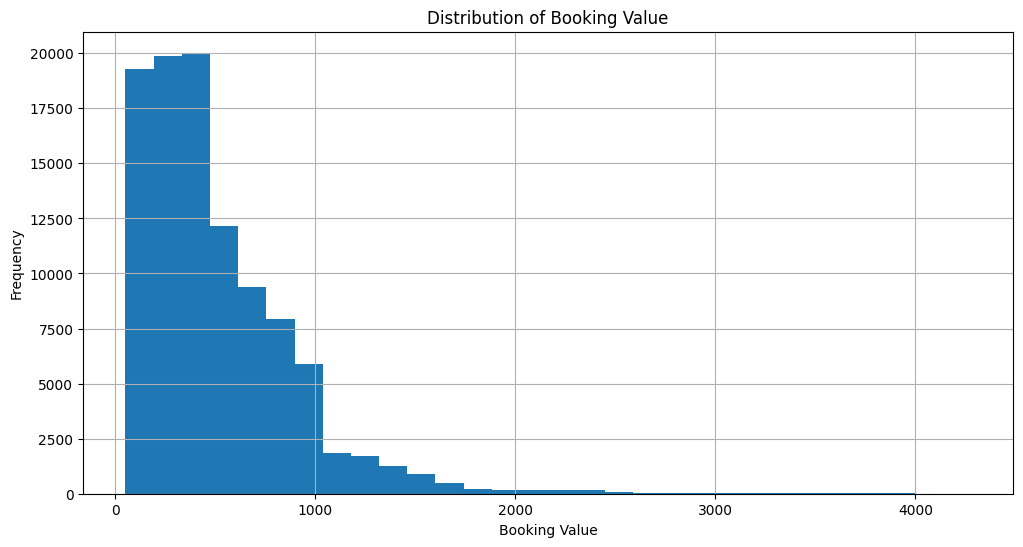

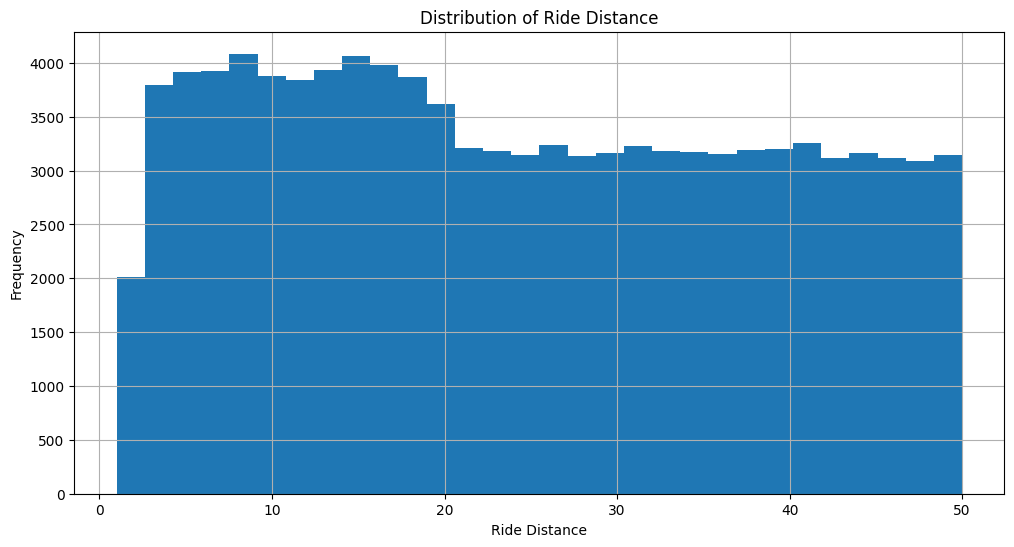

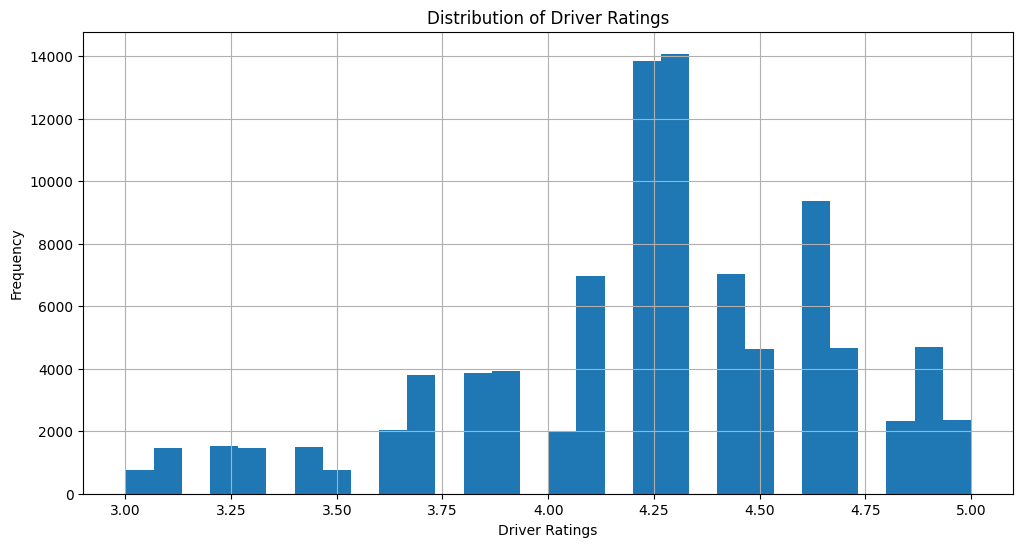

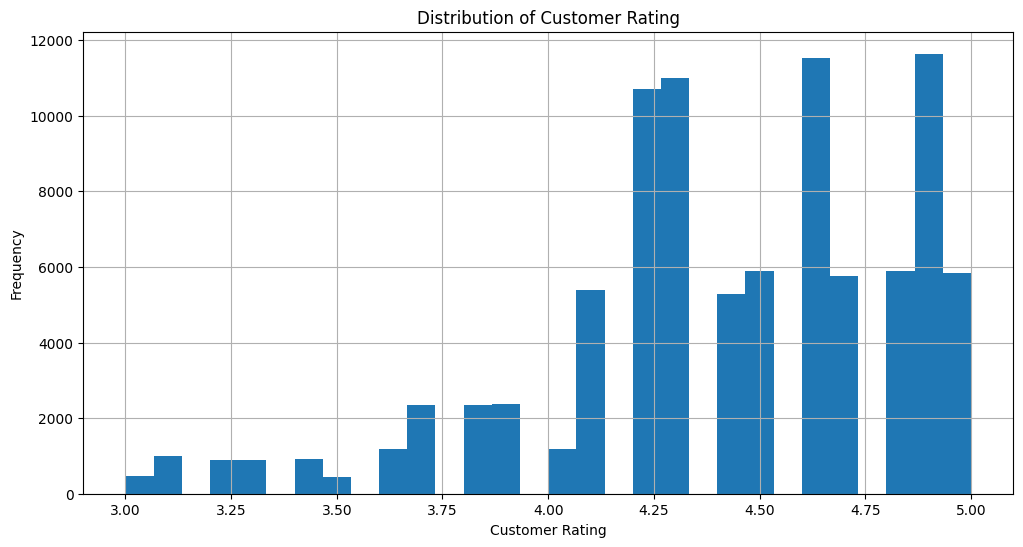

In [42]:
numerical_cols = ["Avg VTAT","Avg CTAT","Booking Value","Ride Distance","Driver Ratings","Customer Rating",]
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

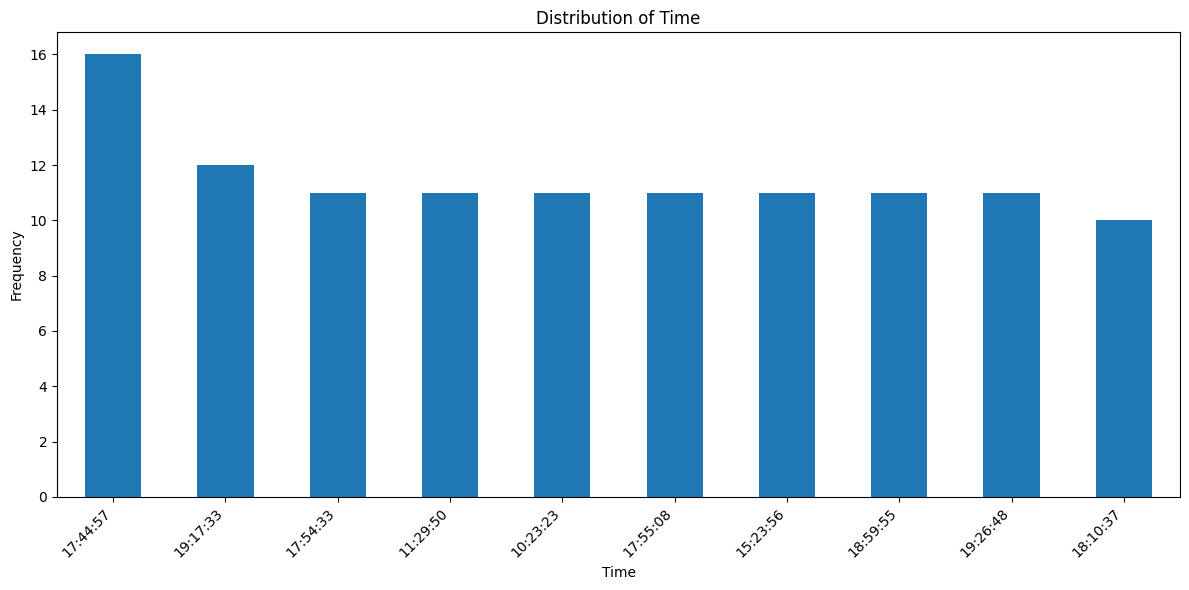

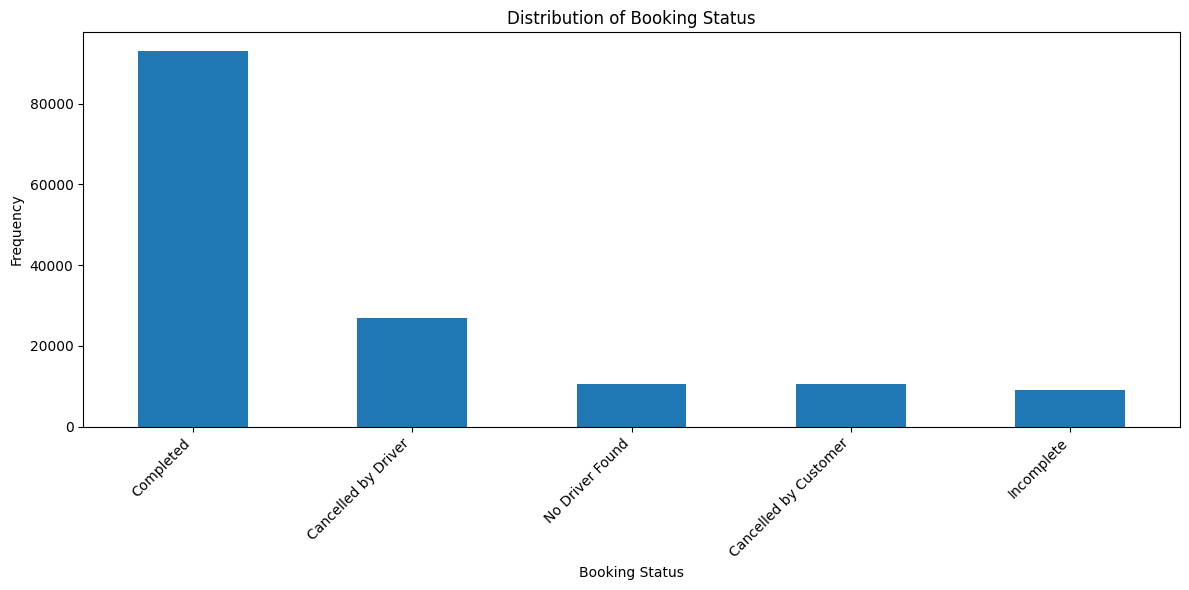

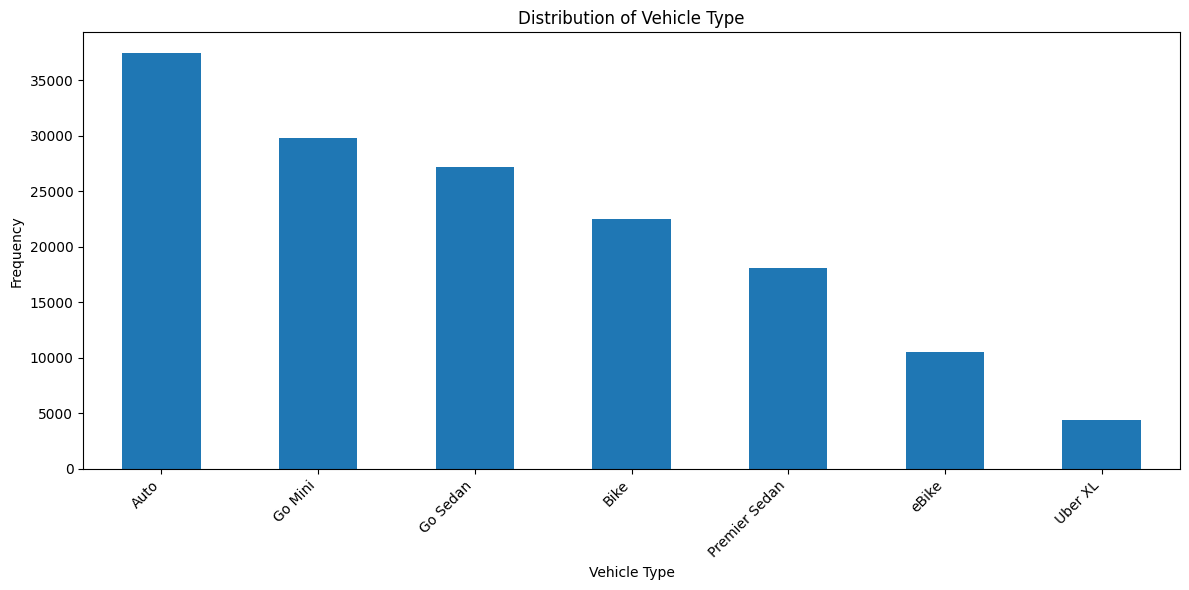

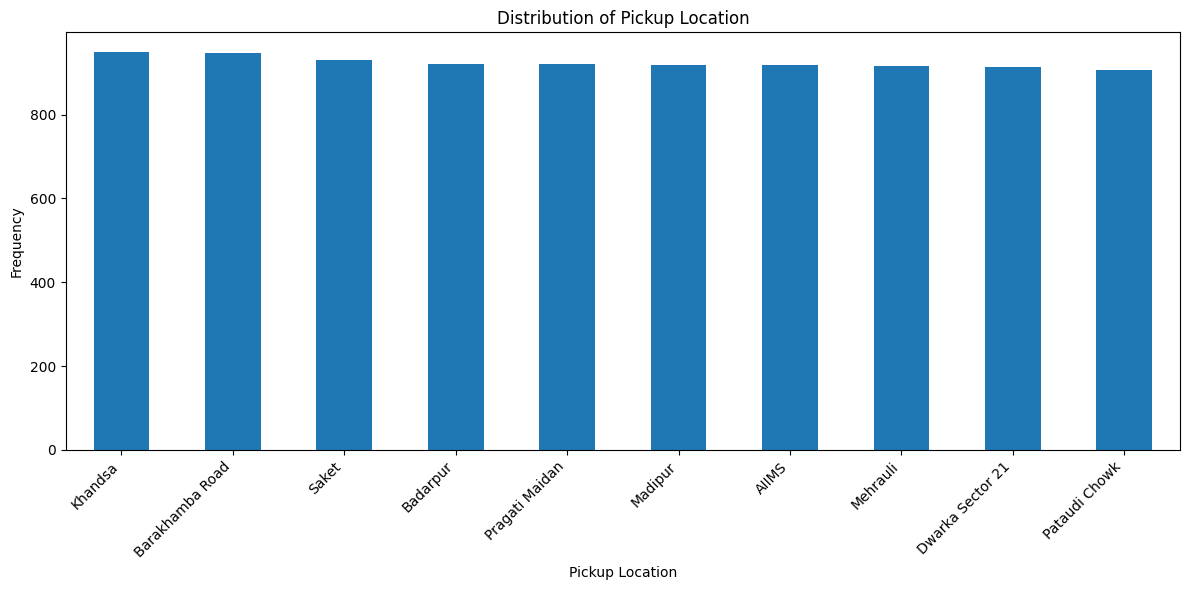

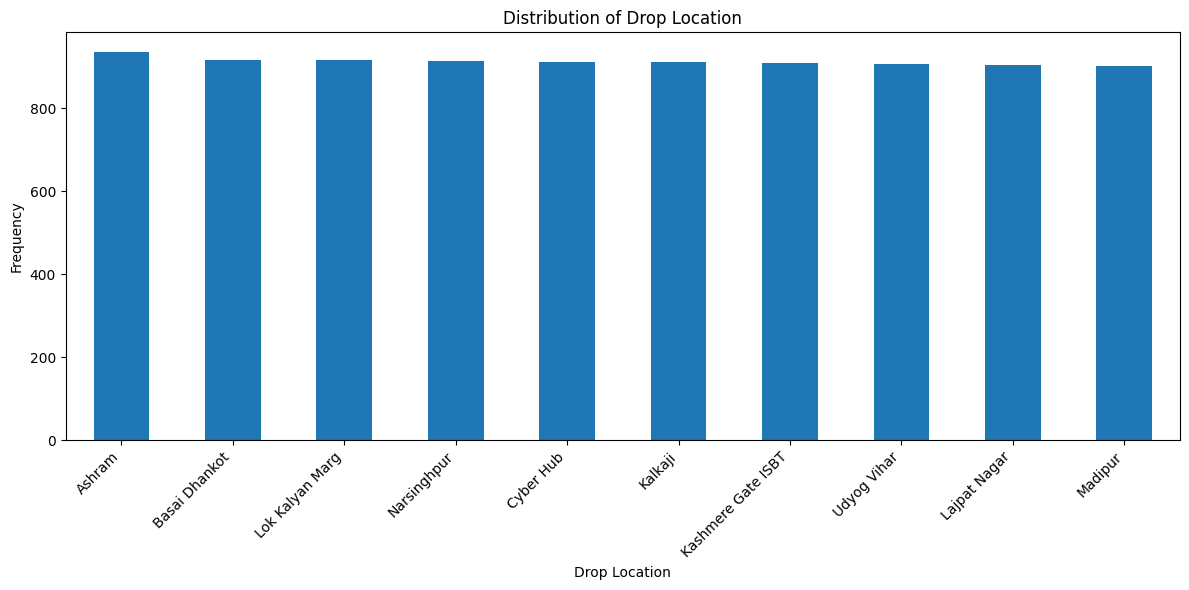

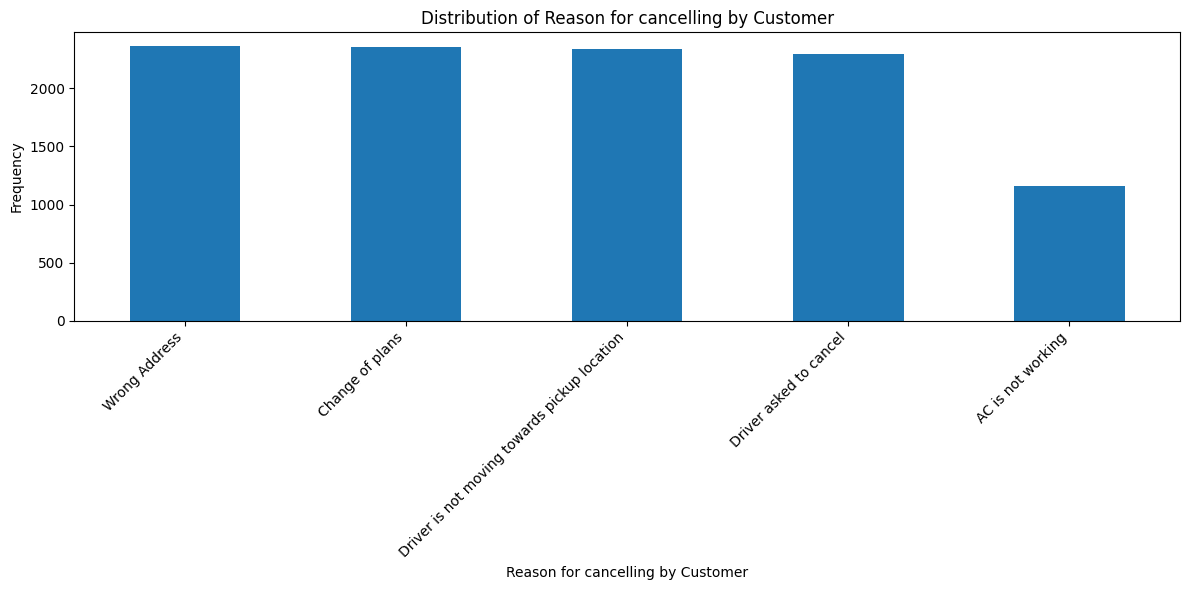

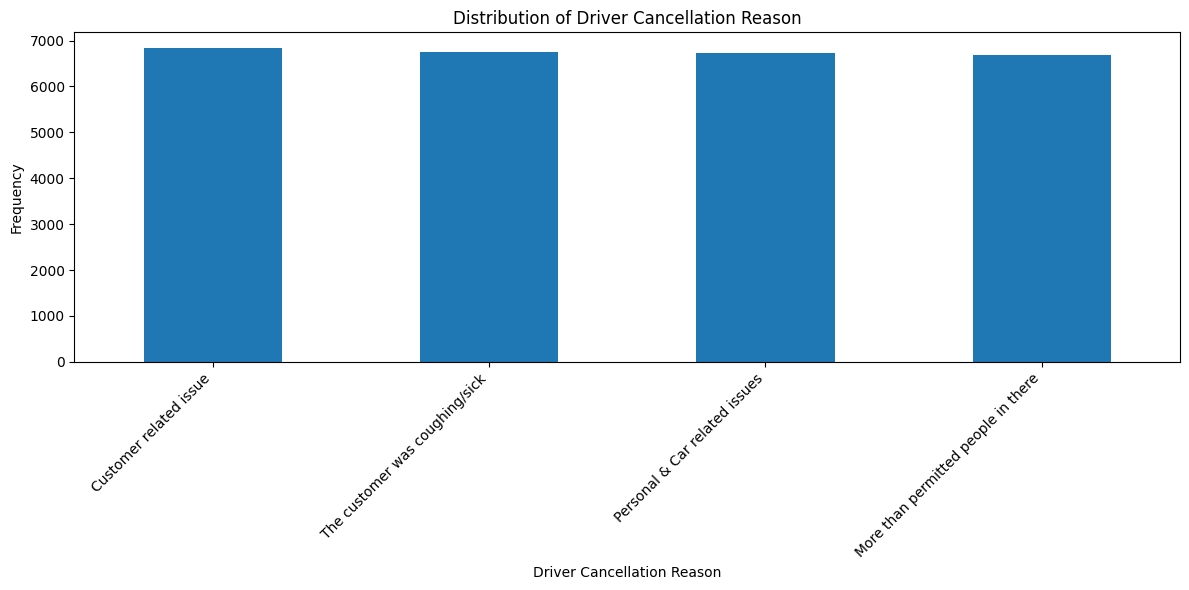

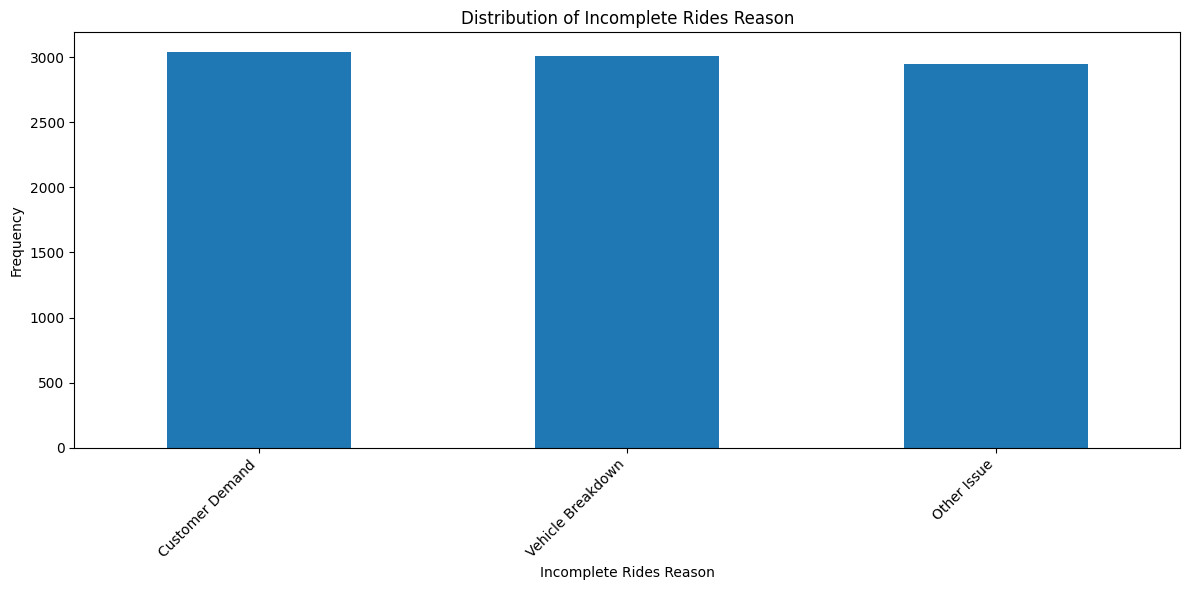

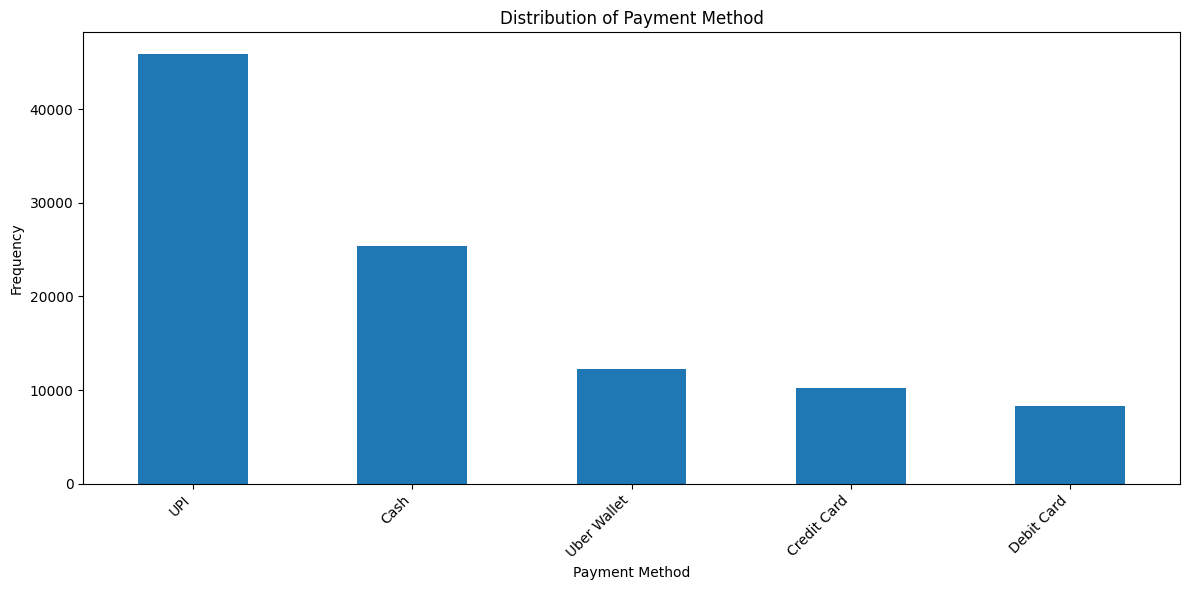

In [43]:
categorical_cols = df.drop(["Booking ID","Customer ID"],axis = 1).select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    top_categories = df[col].value_counts().head(10)
    top_categories.plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Data Analysis Key Findings

*   Several columns have a significant number of missing values, including `Avg VTAT`, `Avg CTAT`, `Cancelled Rides by Customer`, `Reason for cancelling by Customer`, `Cancelled Rides by Driver`, `Driver Cancellation Reason`, `Incomplete Rides`, `Incomplete Rides Reason`, `Booking Value`, `Ride Distance`, `Driver Ratings`, `Customer Rating`, and `Payment Method`.
*   The descriptive statistics for numerical columns show a wide range in 'Booking Value' (from 50 to 4277).
*   62% rides were completed , 18% were Canceled by driver , 7% were cancled by the customer and no driver was found in 7% of the cases
*   Histograms were generated for numerical features, and bar plots for the top 10 categories of categorical features, providing visual insights into their distributions.
* The most prefered Vehical type is the the Auto
* The most prefered Payment type was UPI

In [47]:
no_driver_found_df = df[df['Booking Status'] == 'No Driver Found']
pickup_location_counts = no_driver_found_df['Pickup Location'].value_counts()

print("Pickup locations where no driver was found:")
display(pickup_location_counts)

Pickup locations where no driver was found:


,count
Pickup Location,
Old Gurgaon,83
Pataudi Chowk,80
Paharganj,79
Greater Noida,77
Vinobapuri,76
...,...
Malviya Nagar,46
Golf Course Road,45
Shivaji Park,44


In [44]:
df.fillna({"Avg VTAT":df['Avg VTAT'].mean(),
           "Avg CTAT":df['Avg CTAT'].mean(),
           "Cancelled Rides by Customer": 0 ,
           "Reason for cancelling by Customer":"",
           "Cancelled Rides by Driver":0,
           "Driver Cancellation Reason":"",
           "Incomplete Rides": 0 ,
           "Incomplete Rides Reason":"",
           "Booking Value":df['Booking Value'].mean(),
           "Ride Distance":df['Ride Distance'].mean(),
           "Driver Ratings":"Not Given",
           "Customer Rating":"Not Given",
           "Payment Method": "Unknown"}, inplace=True)


In [45]:
df.isnull().sum()


,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,0
Avg CTAT,0
